Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:
Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

Change effective to date column to datetime format.

Customer -> Drop

In [3]:
customer_df.columns = customer_df.columns.str.replace(' ','_').str.lower()

In [4]:
customer_df['effective_to_date'] = customer_df['effective_to_date'].apply(pd.to_datetime)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [6]:
z = customer_df['customer']
customer_df = customer_df.drop('customer',1)

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_26745/3832438179.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  customer_df = customer_df.drop('customer',1)


In [7]:
customer_df.isnull().sum()/len(customer_df) # No NaN's!

state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

Define a function that differentiates between continuous and discrete variables.
Hint: The number of unique values might be useful.
Store continuous data into a continuous_df variable and do the same for discrete_df

In [8]:
# https://stackoverflow.com/questions/26977076/pandas-unique-values-multiple-columns
# Note that ravel() is an array method that returns a view (if possible) of a multidimensional array.
# The argument 'K' tells the method to flatten the array in the order the elements are stored in the memory
# (pandas typically stores underlying arrays in Fortran-contiguous order; columns before rows).
# This can be significantly faster than using the method's default 'C' order.
# pd.unique(customer_df[x].values.ravel('K') ... I don't need to specify the ravel...
for x in customer_df:
    print(x, ' ---->', len(pd.unique(customer_df[x].values))) #customer_df.state.nunique()

state  ----> 5
customer_lifetime_value  ----> 8041
response  ----> 2
coverage  ----> 3
education  ----> 5
effective_to_date  ----> 59
employmentstatus  ----> 5
gender  ----> 2
income  ----> 5694
location_code  ----> 3
marital_status  ----> 3
monthly_premium_auto  ----> 202
months_since_last_claim  ----> 36
months_since_policy_inception  ----> 100
number_of_open_complaints  ----> 6
number_of_policies  ----> 9
policy_type  ----> 3
policy  ----> 9
renew_offer_type  ----> 4
sales_channel  ----> 4
total_claim_amount  ----> 5106
vehicle_class  ----> 6
vehicle_size  ----> 3


In [9]:
def c_d(x):
    a=pd.DataFrame()
    b=pd.DataFrame()
    for column in x:
        if len(pd.unique(x[column].values.ravel('K'))) >= 10:
            a[column] = x[column]
        else:
            b[column] = x[column]
    return a, b 

In [10]:
continuous_df, discrete_df = c_d(customer_df)

In [11]:
continuous_df.columns

Index(['customer_lifetime_value', 'effective_to_date', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')

In [12]:
discrete_df.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size'],
      dtype='object')

Plot a correlation matrix, comment what you see.

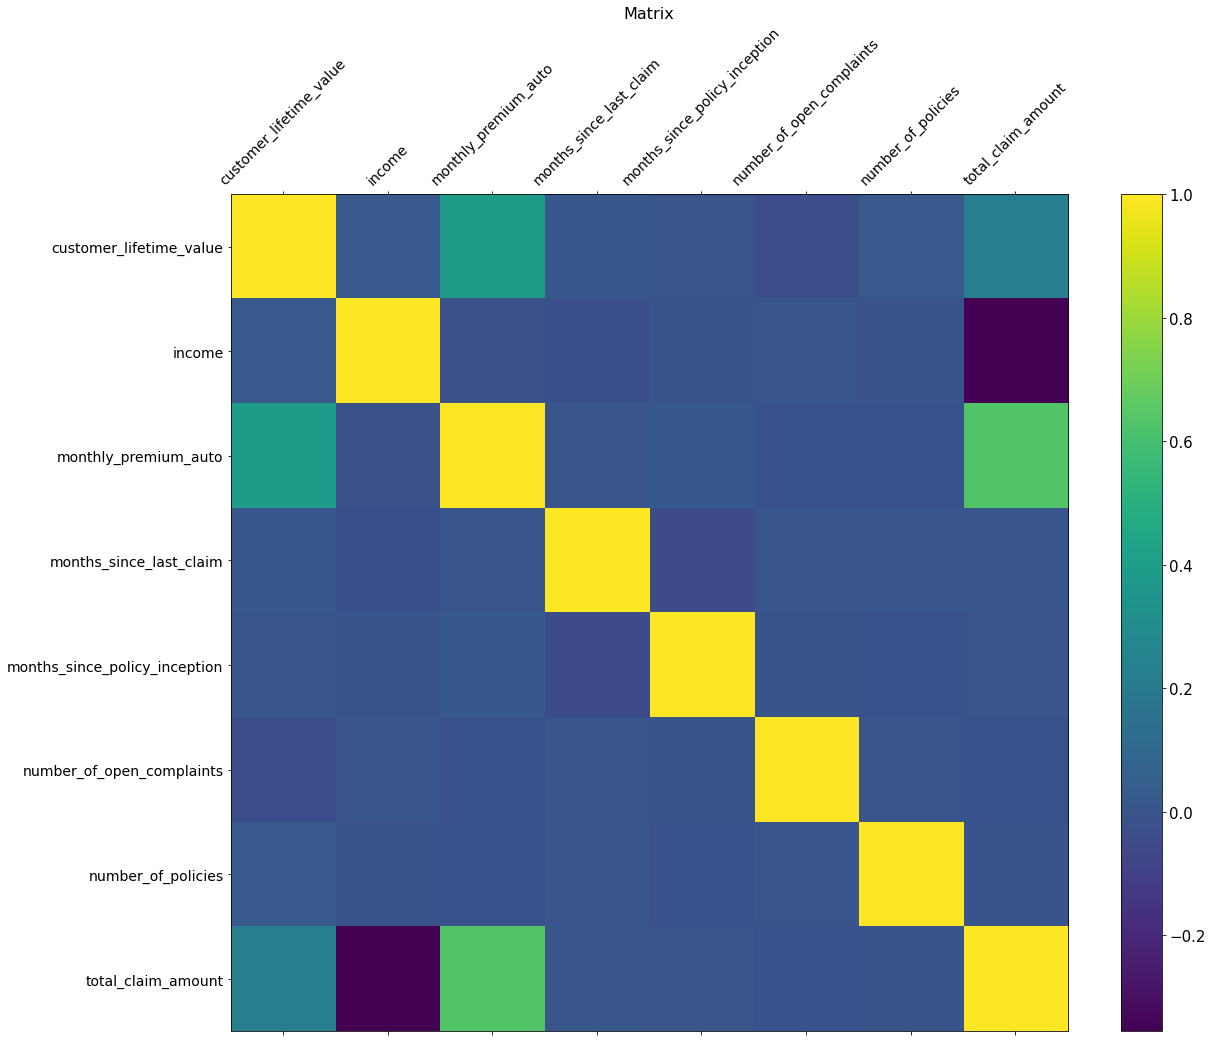

In [13]:
# new correlation matrix in -> https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
f = plt.figure(figsize=(19, 15))
plt.matshow(customer_df.corr(), fignum=f.number)
plt.xticks(range(customer_df.select_dtypes(np.number).shape[1]), customer_df.select_dtypes(np.number).columns, fontsize=14, rotation=45)
plt.yticks(range(customer_df.select_dtypes(np.number).shape[1]), customer_df.select_dtypes(np.number).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=15)
plt.title('Matrix', fontsize=16);

There's a correlation, positive correlation, between:
    monthly premium_auto and customer_lifetime_value
    total_claim_amount and customer_lifetime_value
    monthly_premium_auto and total_claim_amount
There's a correlation, negative correlation, between:
    income and total_claim_amount

Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [14]:
def ploting(x):
    if x is discrete_df:
        for z in x.columns:
            plt.figure()
            plt.xticks(rotation=45)
            plt.hist(x[z])
    elif x is continuous_df:
        for z in x.columns:
            plt.figure()
            plt.xticks(rotation=45)
            plt.hist(x[z])

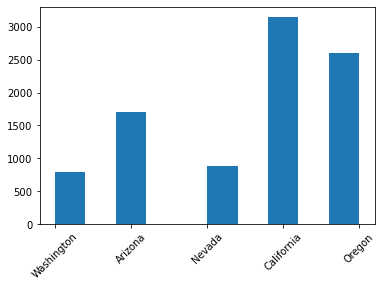

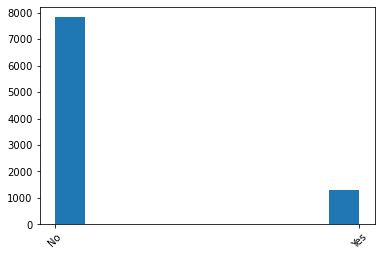

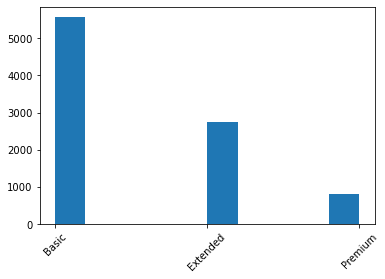

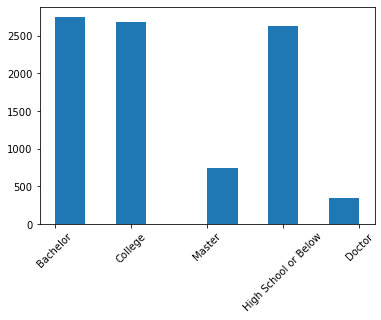

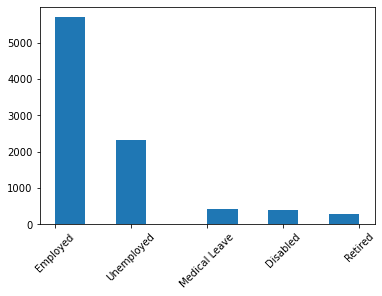

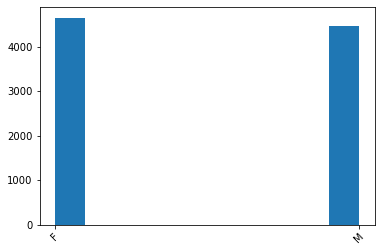

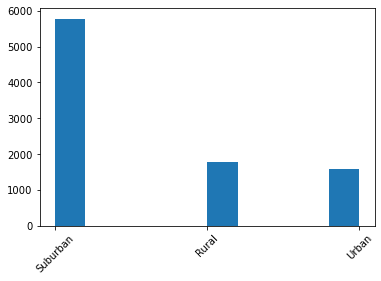

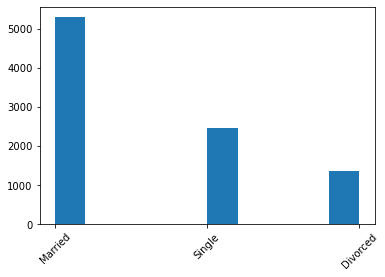

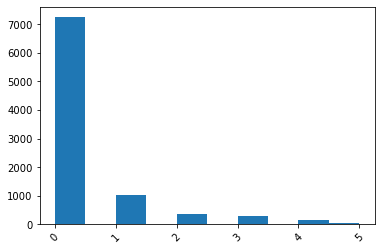

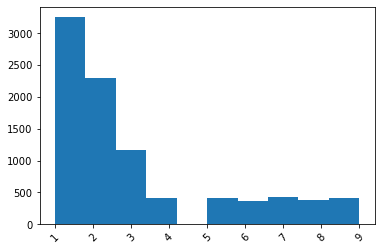

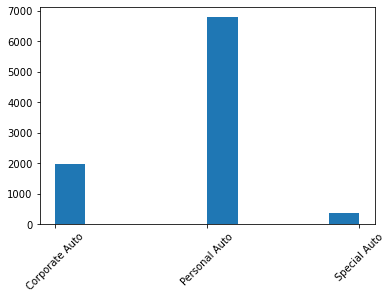

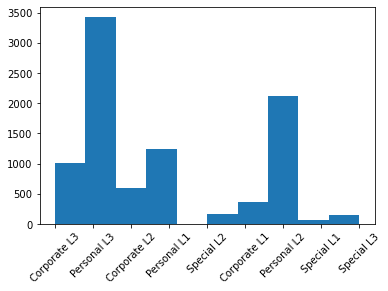

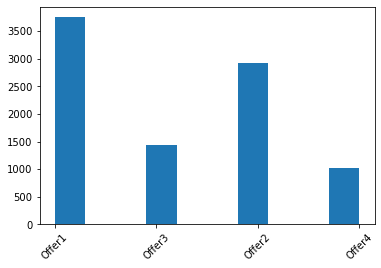

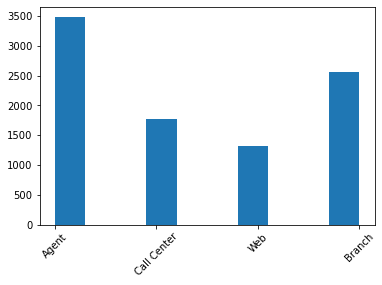

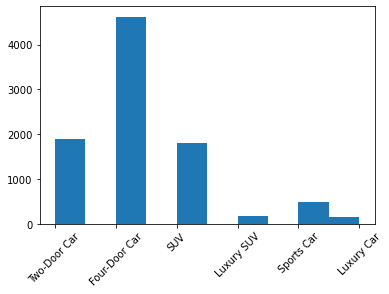

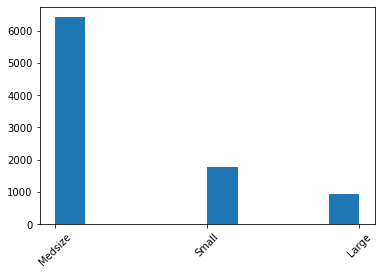

In [15]:
ploting(discrete_df)

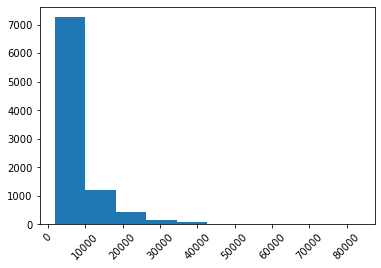

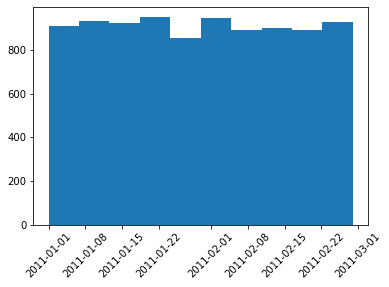

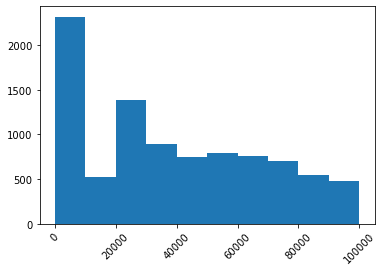

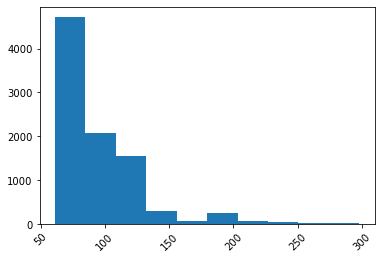

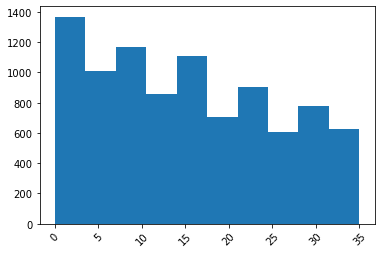

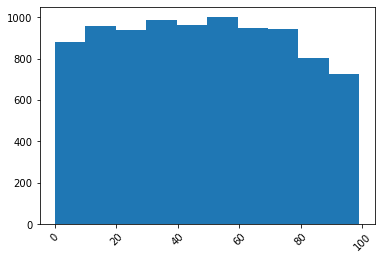

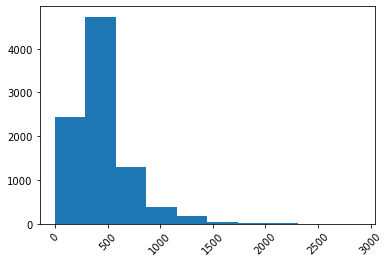

In [16]:
ploting(continuous_df)

In [17]:
def ploting_discrete(x):
    for z in x.columns:
        plt.figure()
        plt.xticks(rotation=45)
        plt.hist(x[z])

In [18]:
def ploting_continuous(x):
    for z in x.columns:
        plt.figure()
        plt.xticks(rotation=45)
        plt.hist(x[z])

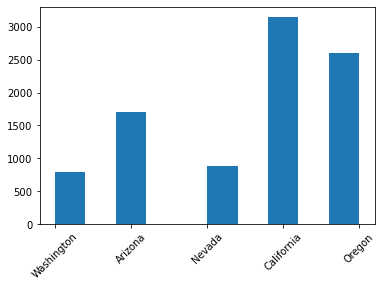

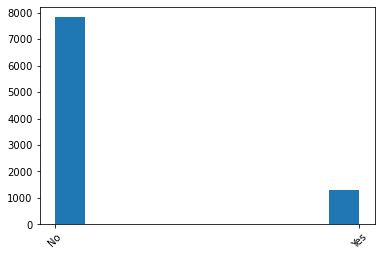

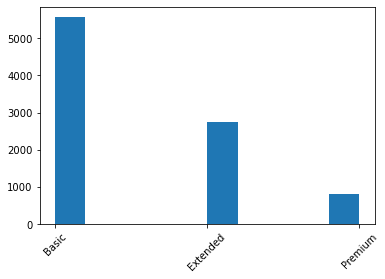

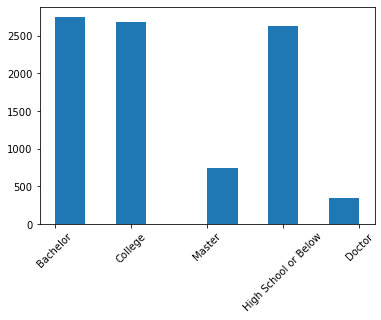

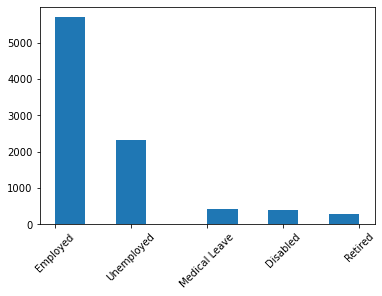

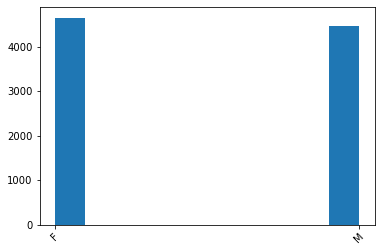

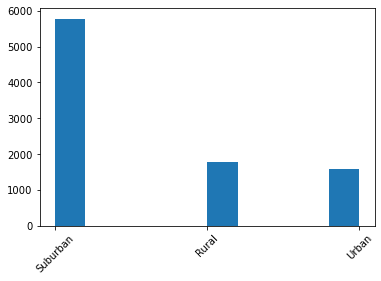

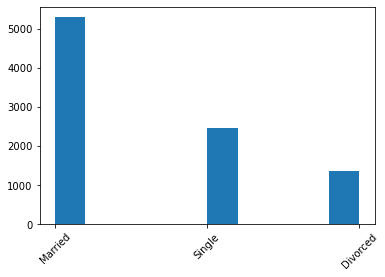

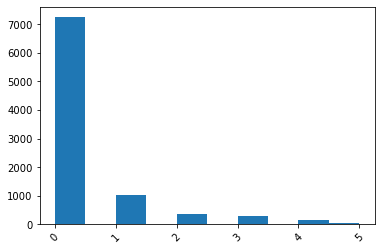

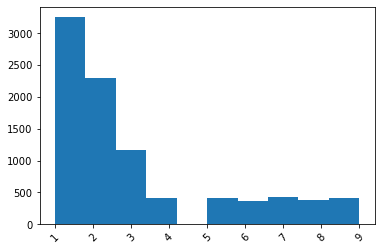

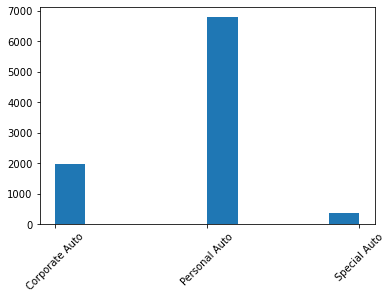

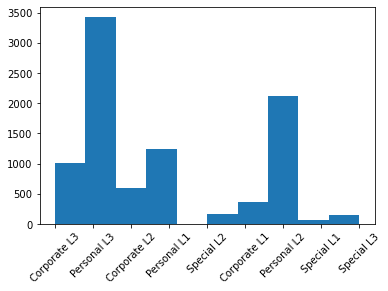

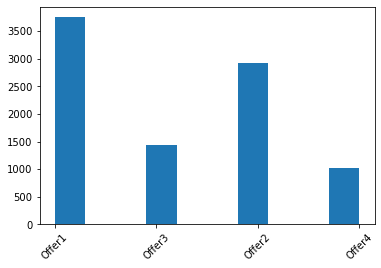

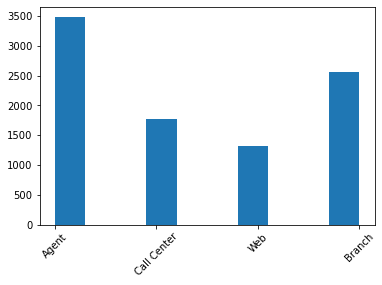

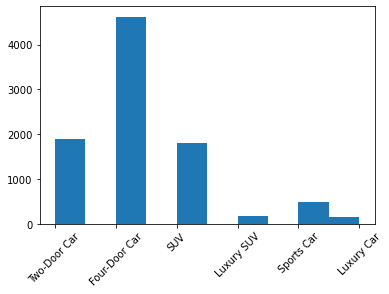

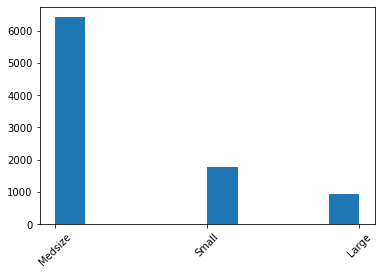

In [19]:
ploting_discrete(discrete_df)

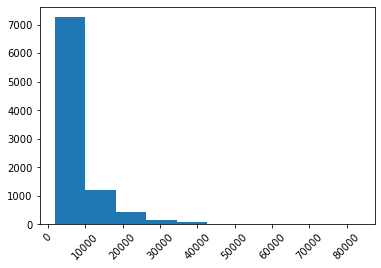

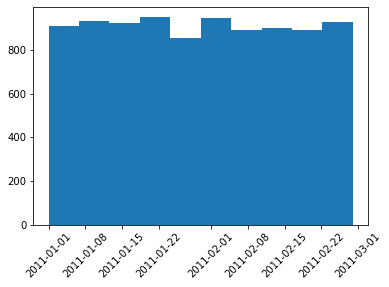

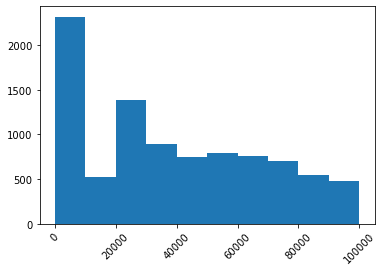

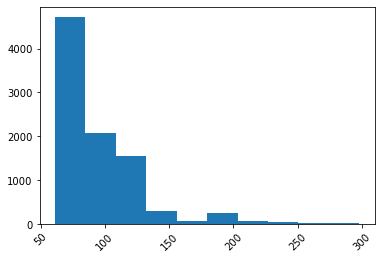

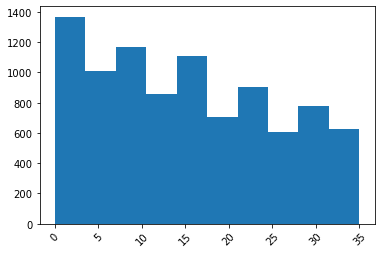

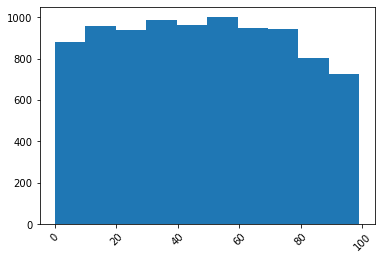

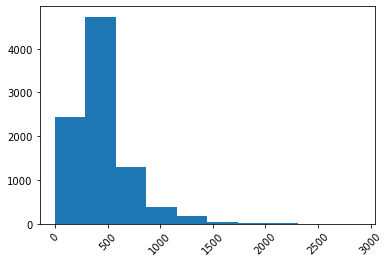

In [20]:
ploting_continuous(continuous_df)

Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [21]:
def box_plot(x):
    for z in continuous_df[['customer_lifetime_value','income',
     'monthly_premium_auto', 'months_since_last_claim',
     'months_since_policy_inception', 'total_claim_amount']]:
        sns.boxplot(y=continuous_df[z])
        plt.title(z, fontsize=16)
        plt.show()

I will not plot the effective_to_date...

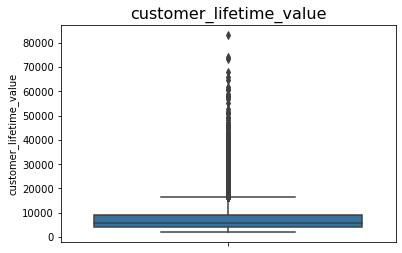

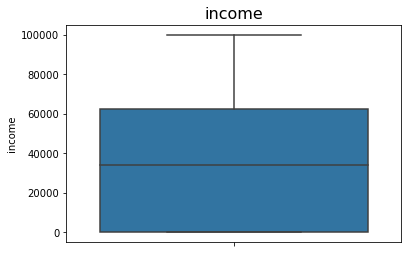

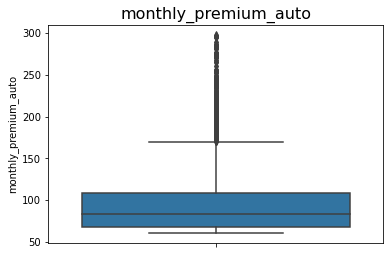

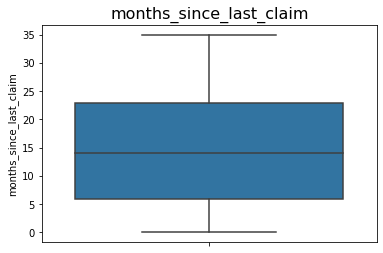

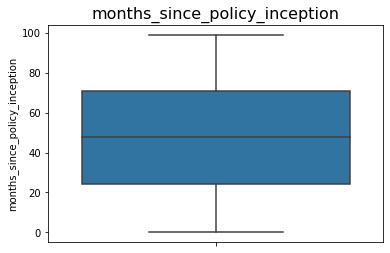

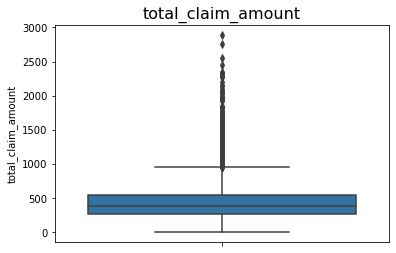

In [22]:
box_plot(continuous_df)

In [23]:
#def scatter_plot(x):
#    for z in x[['customer_lifetime_value','income',
#       'monthly_premium_auto', 'months_since_last_claim',
#       'months_since_policy_inception', 'total_claim_amount']]:
#        sns.scatterplot(x[z], x[z])
#        plt.title(z, fontsize=16)
#        plt.show()

In [24]:
#scatter_plot(continuous_df)

Did you find outliers? Comment what you will do with them.

customer_lifetime_value & monthly_premium_auto & total_claim_amount have a lot of outliers...

Although we have outliers, they look like real values and not typos or other funny things. And they are a lot!
So, probably, I would keep the outliers, since they are a true representation of my data and they are useful for the accuracy of a future model.

Check all columns for NaN values. Decide what (if anything) you will need to do with them.

There're no NAN's...I checked in the beginning.

# 2nd LAB 

### Find all of the categorical data. Save it in a categorical_df variable.

In [25]:
categorical_df = discrete_df.drop(['number_of_open_complaints','number_of_policies'], axis =1)

### Check for NaN values.

I've done it before...

In [26]:
categorical_df.isnull().sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

### Check all unique values of columns.

In [27]:
# https://stackoverflow.com/questions/47933213/list-unique-values-in-a-pandas-dataframe
unique_values =pd.Series({c: categorical_df[c].unique() for c in categorical_df})
unique_values

state               [Washington, Arizona, Nevada, California, Oregon]
response                                                    [No, Yes]
coverage                                   [Basic, Extended, Premium]
education           [Bachelor, College, Master, High School or Bel...
employmentstatus    [Employed, Unemployed, Medical Leave, Disabled...
gender                                                         [F, M]
location_code                                [Suburban, Rural, Urban]
marital_status                            [Married, Single, Divorced]
policy_type             [Corporate Auto, Personal Auto, Special Auto]
policy              [Corporate L3, Personal L3, Corporate L2, Pers...
renew_offer_type                     [Offer1, Offer3, Offer2, Offer4]
sales_channel                       [Agent, Call Center, Web, Branch]
vehicle_class       [Two-Door Car, Four-Door Car, SUV, Luxury SUV,...
vehicle_size                                  [Medsize, Small, Large]
dtype: object

### Check dtypes. Do they all make sense as categorical data?

In [28]:
categorical_df.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [29]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Does any column contain alpha and numeric data? Decide how to clean it.

Does any column contain alpha and numeric data? Decide how to clean it.
I've droped the column Customer in the beginning, so I don't want to change anything else...All the others
alphanumeric columns looks fine for the next steps... 

### Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [30]:
categorical_df = categorical_df.drop('policy_type',1)

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_26745/695813725.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  categorical_df = categorical_df.drop('policy_type',1)


In [31]:
for x in categorical_df:
    print(len(pd.unique(categorical_df[x].values.ravel('K'))))

5
2
3
5
5
2
3
3
9
4
4
6
3


In [32]:
for x in categorical_df:
    display(categorical_df.groupby(x).count())

,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
state,,,,,,,,,,,,
Arizona,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703
California,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150,3150
Nevada,882,882,882,882,882,882,882,882,882,882,882,882
Oregon,2601,2601,2601,2601,2601,2601,2601,2601,2601,2601,2601,2601
Washington,798,798,798,798,798,798,798,798,798,798,798,798


,state,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
response,,,,,,,,,,,,
No,7826,7826,7826,7826,7826,7826,7826,7826,7826,7826,7826,7826
Yes,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308


,state,response,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
coverage,,,,,,,,,,,,
Basic,5568,5568,5568,5568,5568,5568,5568,5568,5568,5568,5568,5568
Extended,2742,2742,2742,2742,2742,2742,2742,2742,2742,2742,2742,2742
Premium,824,824,824,824,824,824,824,824,824,824,824,824


,state,response,coverage,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
education,,,,,,,,,,,,
Bachelor,2748,2748,2748,2748,2748,2748,2748,2748,2748,2748,2748,2748
College,2681,2681,2681,2681,2681,2681,2681,2681,2681,2681,2681,2681
Doctor,342,342,342,342,342,342,342,342,342,342,342,342
High School or Below,2622,2622,2622,2622,2622,2622,2622,2622,2622,2622,2622,2622
Master,741,741,741,741,741,741,741,741,741,741,741,741


,state,response,coverage,education,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
employmentstatus,,,,,,,,,,,,
Disabled,405,405,405,405,405,405,405,405,405,405,405,405
Employed,5698,5698,5698,5698,5698,5698,5698,5698,5698,5698,5698,5698
Medical Leave,432,432,432,432,432,432,432,432,432,432,432,432
Retired,282,282,282,282,282,282,282,282,282,282,282,282
Unemployed,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317,2317


,state,response,coverage,education,employmentstatus,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
gender,,,,,,,,,,,,
F,4658,4658,4658,4658,4658,4658,4658,4658,4658,4658,4658,4658
M,4476,4476,4476,4476,4476,4476,4476,4476,4476,4476,4476,4476


,state,response,coverage,education,employmentstatus,gender,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
location_code,,,,,,,,,,,,
Rural,1773,1773,1773,1773,1773,1773,1773,1773,1773,1773,1773,1773
Suburban,5779,5779,5779,5779,5779,5779,5779,5779,5779,5779,5779,5779
Urban,1582,1582,1582,1582,1582,1582,1582,1582,1582,1582,1582,1582


,state,response,coverage,education,employmentstatus,gender,location_code,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
marital_status,,,,,,,,,,,,
Divorced,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369
Married,5298,5298,5298,5298,5298,5298,5298,5298,5298,5298,5298,5298
Single,2467,2467,2467,2467,2467,2467,2467,2467,2467,2467,2467,2467


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,renew_offer_type,sales_channel,vehicle_class,vehicle_size
policy,,,,,,,,,,,,
Corporate L1,359,359,359,359,359,359,359,359,359,359,359,359
Corporate L2,595,595,595,595,595,595,595,595,595,595,595,595
Corporate L3,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014,1014
Personal L1,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240
Personal L2,2122,2122,2122,2122,2122,2122,2122,2122,2122,2122,2122,2122
Personal L3,3426,3426,3426,3426,3426,3426,3426,3426,3426,3426,3426,3426
Special L1,66,66,66,66,66,66,66,66,66,66,66,66
Special L2,164,164,164,164,164,164,164,164,164,164,164,164
Special L3,148,148,148,148,148,148,148,148,148,148,148,148


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,sales_channel,vehicle_class,vehicle_size
renew_offer_type,,,,,,,,,,,,
Offer1,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752
Offer2,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926
Offer3,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432
Offer4,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,vehicle_class,vehicle_size
sales_channel,,,,,,,,,,,,
Agent,3477,3477,3477,3477,3477,3477,3477,3477,3477,3477,3477,3477
Branch,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567
Call Center,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765
Web,1325,1325,1325,1325,1325,1325,1325,1325,1325,1325,1325,1325


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_size
vehicle_class,,,,,,,,,,,,
Four-Door Car,4621,4621,4621,4621,4621,4621,4621,4621,4621,4621,4621,4621
Luxury Car,163,163,163,163,163,163,163,163,163,163,163,163
Luxury SUV,184,184,184,184,184,184,184,184,184,184,184,184
SUV,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796
Sports Car,484,484,484,484,484,484,484,484,484,484,484,484
Two-Door Car,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
vehicle_size,,,,,,,,,,,,
Large,946,946,946,946,946,946,946,946,946,946,946,946
Medsize,6424,6424,6424,6424,6424,6424,6424,6424,6424,6424,6424,6424
Small,1764,1764,1764,1764,1764,1764,1764,1764,1764,1764,1764,1764


I guess I'll do nothing else...the data seems fine...

### Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

Already answered before...

### Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [33]:
unique_values_n =pd.Series({c: categorical_df[c].nunique() for c in categorical_df})
unique_values_n

state               5
response            2
coverage            3
education           5
employmentstatus    5
gender              2
location_code       3
marital_status      3
policy              9
renew_offer_type    4
sales_channel       4
vehicle_class       6
vehicle_size        3
dtype: int64

I don't want to merge info...We will lose info that can be important later on...In this dataset there's nothing I would change to make a better prediction later on... It's cleaned and it's well divided...

In [34]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large


# NEW LAB

Plot all the categorical variables with the proper plot. What can you see?
There might be some columns that seem to be redundant, check their values to be sure.
What should we do with them?
Plot time variable. Can you extract something from it?

/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


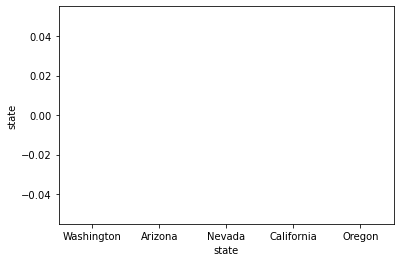

In [35]:
w= categorical_df['state'].value_counts()
ax = sns.swarmplot(categorical_df['state'],categorical_df['state'].value_counts())


# ANOTHER LAB

Lab | Random variable distributions
Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

Instructions
Get the numerical variables from our dataset.
Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [36]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [37]:
data = data.select_dtypes(np.number)

In [38]:
data.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


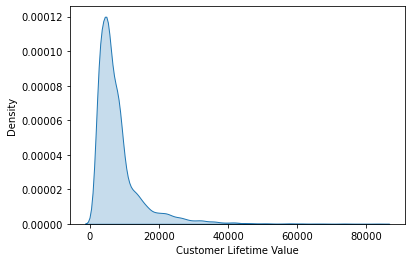

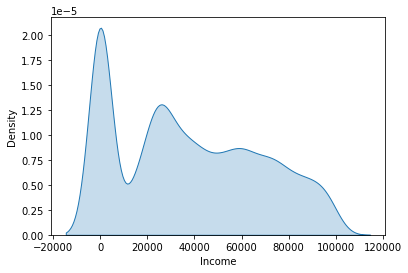

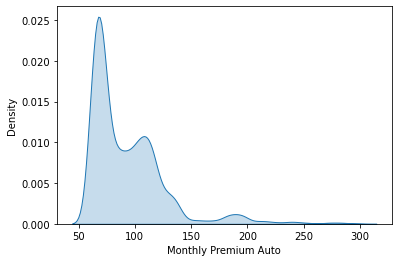

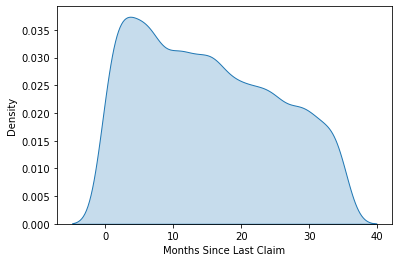

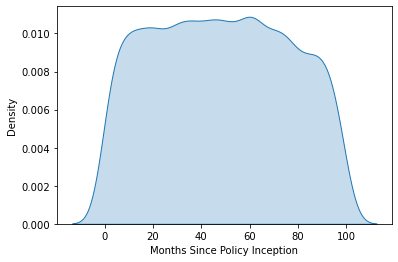

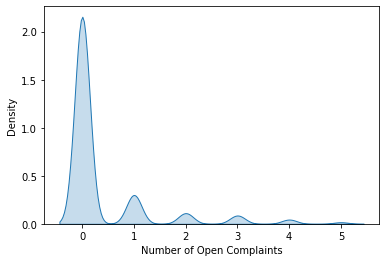

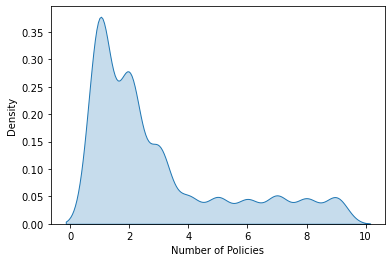

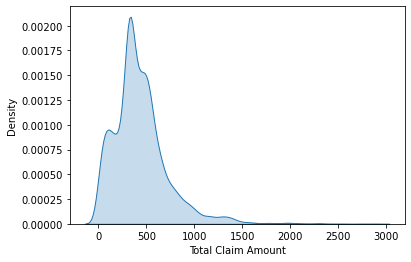

In [39]:
import seaborn as sns
for x in data:
    sns.kdeplot(data[x], shade = True)
    plt.show()

### not sure if any, rather than the Customer Lifetime Value, are normally distrubuted.
### many of them goes up and down and have more than one peak
### any of them look exponential

In [40]:
data_log = pd.DataFrame(np.where(data>0, np.log10(data),0), columns = data.columns)

/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [41]:
data_log

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,3.441462,4.750308,1.838849,1.505150,0.698970,0.000000,0.000000,2.585248
1,3.843827,0.000000,1.973128,1.113943,1.623249,0.000000,0.903090,3.053641
2,4.110166,4.688126,2.033424,1.255273,1.579784,0.000000,0.301030,2.753179
3,3.883426,0.000000,2.025306,1.255273,1.812913,0.000000,0.845098,2.724179
4,3.449277,4.641831,1.863323,1.079181,1.643453,0.000000,0.000000,2.140291
...,...,...,...,...,...,...,...,...
9129,4.369327,4.856976,1.863323,1.255273,1.949390,0.000000,0.301030,2.297180
9130,3.490873,4.334534,1.897627,1.146128,1.447158,0.000000,0.000000,2.578868
9131,3.911897,0.000000,1.929419,0.954243,1.568202,0.477121,0.301030,2.898058
9132,3.876474,4.341256,1.982271,1.531479,0.477121,0.000000,0.477121,2.839604


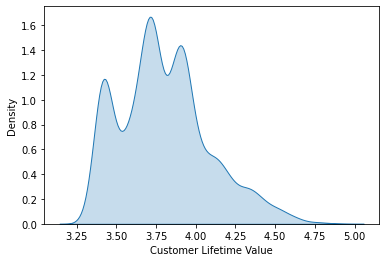

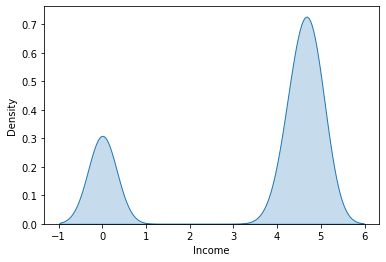

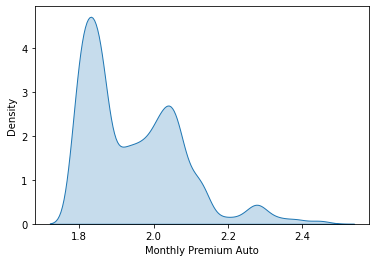

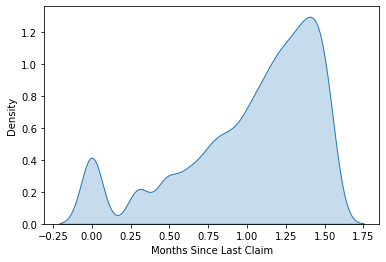

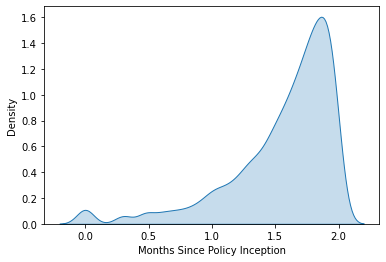

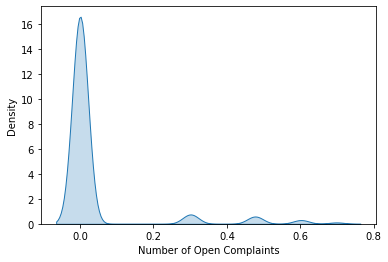

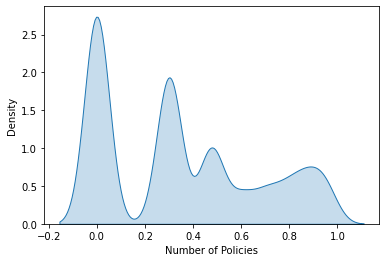

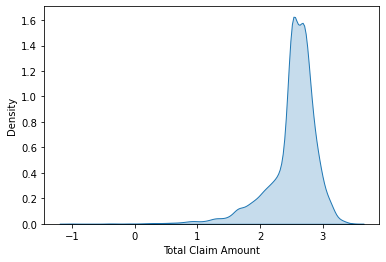

In [42]:
for x in data_log:
    sns.kdeplot(data_log[x], shade = True)
    plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
data_minmax = pd.DataFrame(scaled, columns=data.columns)

In [44]:
data_minmax

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710
...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876


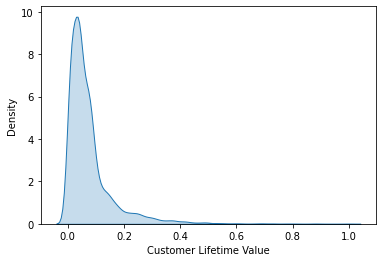

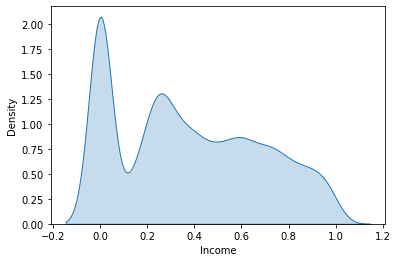

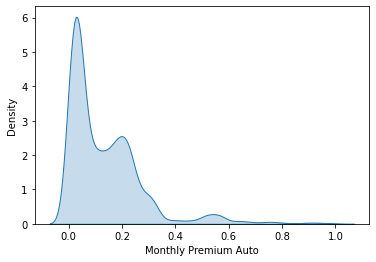

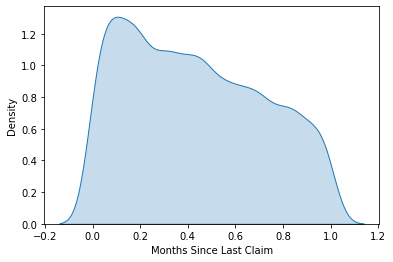

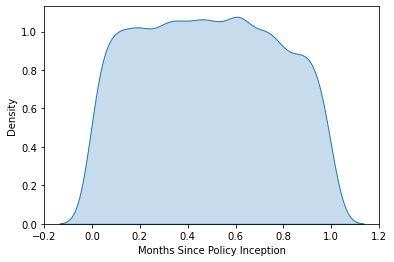

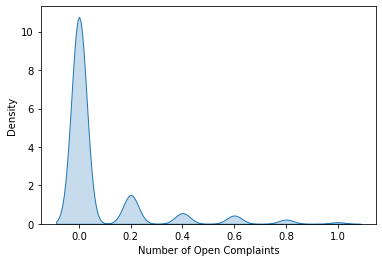

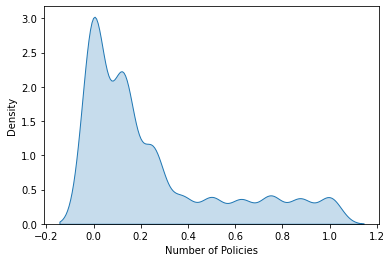

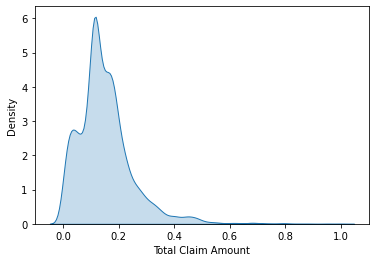

In [45]:
for x in data_minmax:
    sns.kdeplot(data_minmax[x], shade = True)
    plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
data_sscaler = pd.DataFrame(scaled, columns=data.columns)

In [47]:
data_sscaler

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843
...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.811934
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.227937
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.885113


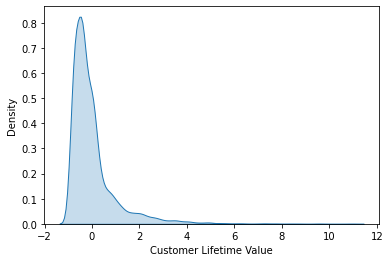

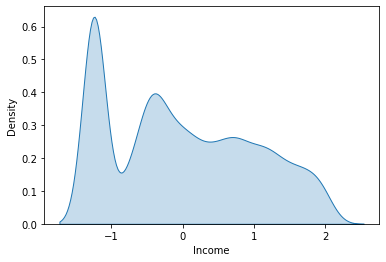

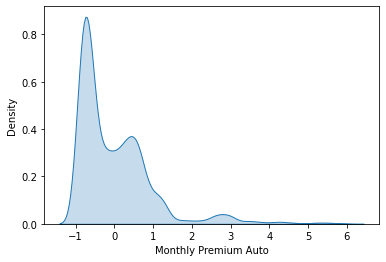

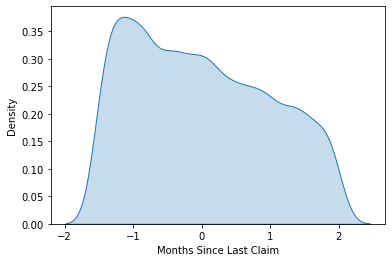

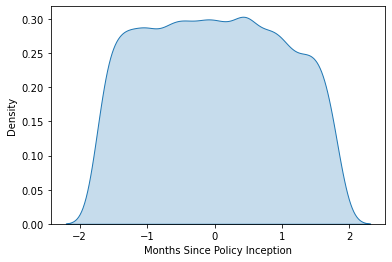

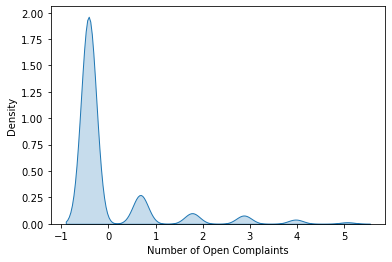

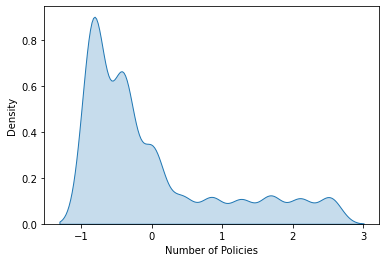

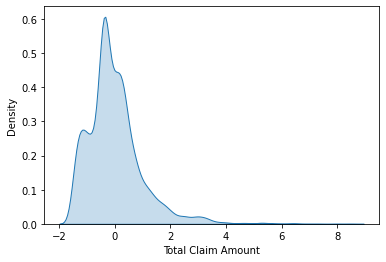

In [48]:
for x in data_sscaler:
    sns.kdeplot(data_sscaler[x], shade = True)
    plt.show()

In [49]:
!pip add .

ERROR: unknown command "add"


In [50]:
!pip status
!pip commit -m 'Lab2 from 06/07'
!pip push

ERROR: unknown command "status"
ERROR: unknown command "commit"
ERROR: unknown command "push"
